In [25]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.preprocessing import OneHotEncoder
import pickle

In [26]:
# Set style for seaborn
sns.set(style="whitegrid")

In [27]:
# Load the dataset
df = pd.read_csv('carbon-free_commutes_tamilnadu.csv')

In [28]:
# Display the first few rows of the dataset
df.head()

,Commuter_ID,City,Mode_of_Transport,Distance_km,Time_Taken_min,CO2_Emissions_Saved_kg
0,CMT0001,Madurai,Metro,18.50,21,0.52
1,CMT0002,Madurai,Electric Bus,11.52,27,0.68
2,CMT0003,Trichy,Carpool,19.43,38,3.28
3,CMT0004,Coimbatore,Metro,10.59,37,1.77
4,CMT0005,Trichy,Walking,8.87,18,2.07


In [29]:
# Basic Descriptive Statistics
df.describe()

,Distance_km,Time_Taken_min,CO2_Emissions_Saved_kg
count,210.000000,210.000000,210.000000
mean,10.309238,34.414286,2.406286
std,5.670576,15.320961,1.358322
min,1.010000,5.000000,0.160000
25%,5.470000,23.000000,1.367500
50%,10.115000,34.000000,2.245000
75%,14.972500,48.000000,3.422500
max,20.000000,60.000000,5.000000


In [30]:
# Check for missing values
df.isnull().sum()

,0
Commuter_ID,0
City,0
Mode_of_Transport,0
Distance_km,0
Time_Taken_min,0
CO2_Emissions_Saved_kg,0


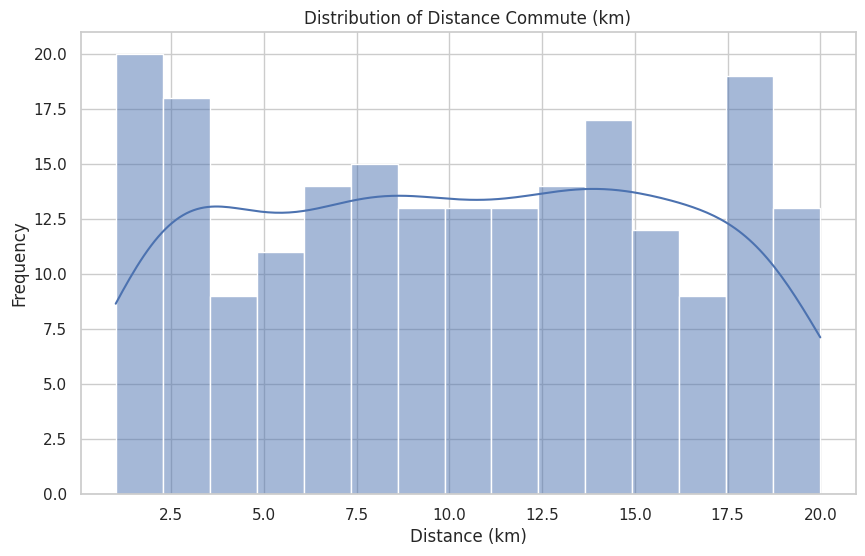

In [31]:
# Visualizing Distribution of Distance
plt.figure(figsize=(10,6))
sns.histplot(df['Distance_km'], bins=15, kde=True)
plt.title('Distribution of Distance Commute (km)')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

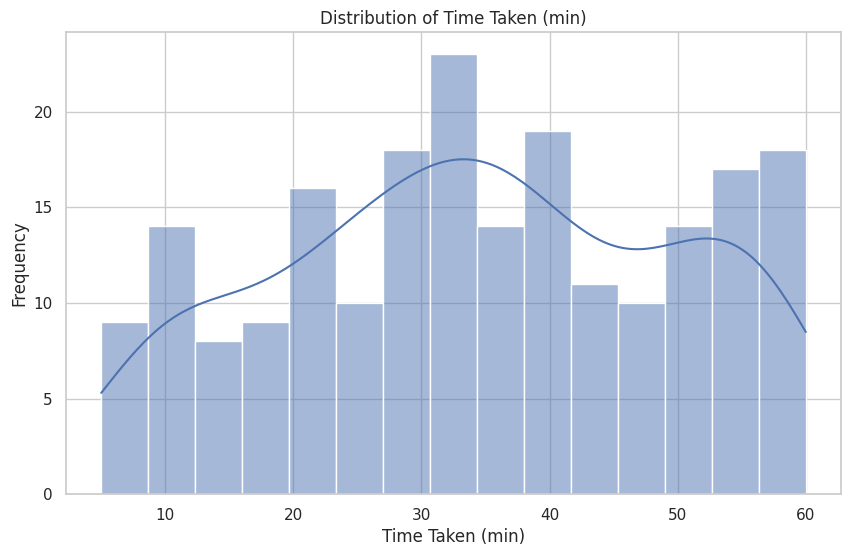

In [32]:
# Visualizing Distribution of Time Taken
plt.figure(figsize=(10,6))
sns.histplot(df['Time_Taken_min'], bins=15, kde=True)
plt.title('Distribution of Time Taken (min)')
plt.xlabel('Time Taken (min)')
plt.ylabel('Frequency')
plt.show()

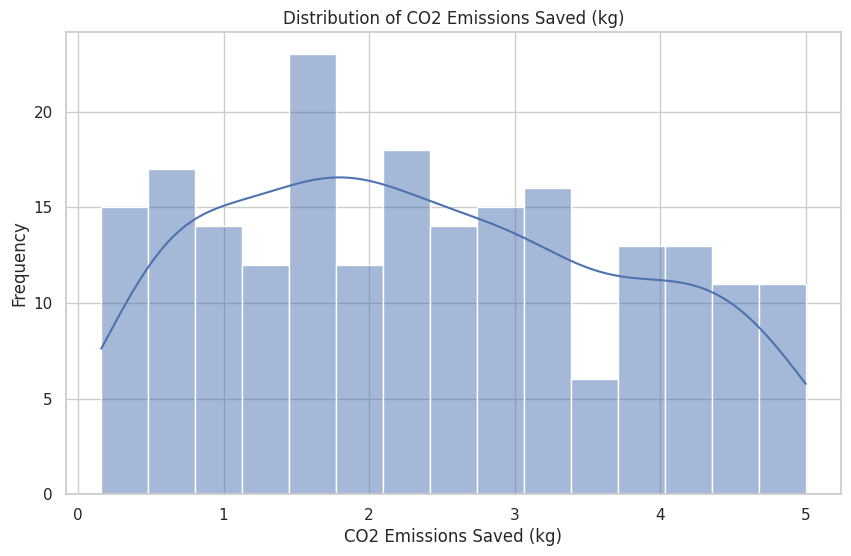

In [33]:
# Visualizing CO2 Emissions Saved
plt.figure(figsize=(10,6))
sns.histplot(df['CO2_Emissions_Saved_kg'], bins=15, kde=True)
plt.title('Distribution of CO2 Emissions Saved (kg)')
plt.xlabel('CO2 Emissions Saved (kg)')
plt.ylabel('Frequency')
plt.show()

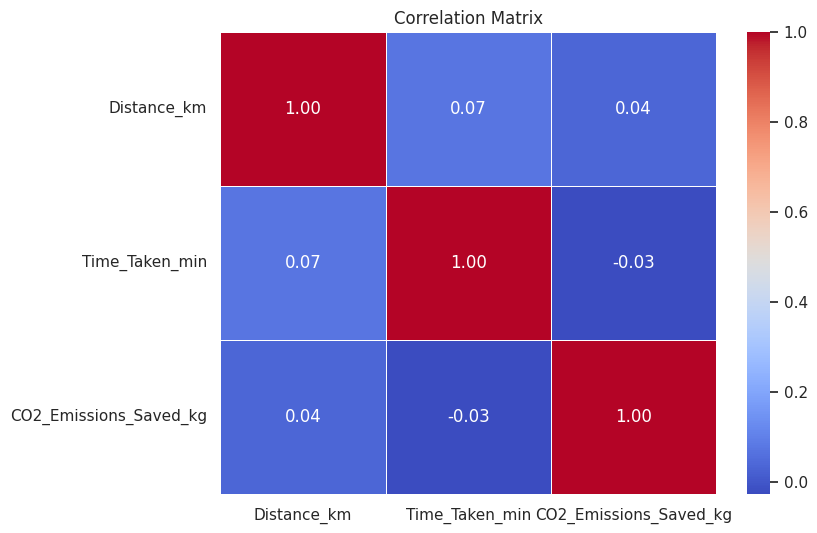

In [34]:
# Correlation Analysis
correlation_matrix = df[['Distance_km', 'Time_Taken_min', 'CO2_Emissions_Saved_kg']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [35]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [36]:
# Feature Selection (Using 'Distance_km' and 'Time_Taken_min' to predict 'CO2_Emissions_Saved_kg')
X = df[['Distance_km', 'Time_Taken_min']]
y = df['CO2_Emissions_Saved_kg']

In [37]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Sample data (Replace this with your actual dataset)
data = pd.DataFrame({
    'Mode_of_Transport': ['Bicycle', 'Carpool', 'Electric Bus', 'Metro', 'Walking']
})

In [39]:
# Initialize and fit the encoder
# The 'sparse' argument is deprecated in newer versions of scikit-learn.
# Use 'sparse_output' instead. If using an old version of scikit learn <1.0 you will need to upgrade.
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(data[['Mode_of_Transport']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
# Save the encoder to a file
joblib.dump(encoder, 'encoder.pkl')
print("Encoder saved successfully!")

In [21]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Now you can use X_train_scaled in your model fitting
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# You will also need to scale X_test before using it for predictions
X_test_scaled = scaler.transform(X_test)

In [22]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Now you can use X_train_scaled in your model fitting
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# You will also need to scale X_test before using it for predictions
X_test_scaled = scaler.transform(X_test)

# Save the model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

# Now load the model that was just created

with open("model.pkl", "rb") as file:
    try:
        model = pickle.load(file)
        print("Model loaded successfully!")
    except Exception as e:
        print(f"Error loading model: {e}")

Model loaded successfully!


In [23]:
# Select numerical columns for scaling
numerical_features = ["Distance_km", "Time_Taken_min"]

# Initialize scaler
scaler = StandardScaler()  # Or MinMaxScaler()

# Fit scaler on the dataset
scaler.fit(df[numerical_features])

# Save the trained scaler to a file
joblib.dump(scaler, "scaler.pkl")

print("Scaler saved successfully!")


Scaler saved successfully!


In [24]:
# Evaluate the model
print("Model Performance on Test Data:")
print(f"R^2 Score: {model.score(X_test_scaled, y_test)}")

Model Performance on Test Data:
R^2 Score: -0.2084937843515271
